# Some Python and Pandas

Since most students are familiar with Python and Pandas, we only covered very selected topics.

## Dictionaries, dict comprehension

In [1]:
{i: i**2 for i in range(10)}

{0: 0, 1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36, 7: 49, 8: 64, 9: 81}

In [2]:
{i: i**2 for i in range(10) if i % 2 == 0}

{0: 0, 2: 4, 4: 16, 6: 36, 8: 64}

In [3]:
{i: i**2 for i in range(10) if i % 2 == 0}[3]

KeyError: 3

In [5]:
{i: i**2 for i in range(10) if i % 2 == 0}.get(3, "Not in my dictionary")

'Not in my dictionary'

In [14]:
def append_suffix(f):
    def new_func(x):
        return f(x) + "_suffix"
    return new_func

In [15]:
@append_suffix
def my_join(x):
    return " ".join(x)

In [16]:
my_join(['please', 'append', 'suffix'])

'please append suffix_suffix'

In [17]:
def m_join(x):
    return " ".join(x)
my_join = append_suffix(m_join)

In [18]:
my_join(['please', 'append', 'suffix'])

'please append suffix_suffix'

## Generators

In [21]:
def exp_series(x, n):
    num = 1
    denom = 1
    for k in range(n):
        yield num/denom
        k += 1
        denom *= k
        num *= x

In [22]:
list(exp_series(2, 10))

[1.0,
 2.0,
 2.0,
 1.3333333333333333,
 0.6666666666666666,
 0.26666666666666666,
 0.08888888888888889,
 0.025396825396825397,
 0.006349206349206349,
 0.0014109347442680777]

# Pandas

In [24]:
import pandas as pd
import numpy as np

In [23]:
['foo', None, [], 1.2]

['foo', None, [], 1.2]

In [25]:
pd.Series(['foo', None, [], 1.2])

0     foo
1    None
2      []
3     1.2
dtype: object

In [26]:
pd.Series(['foo', None, [], 1.2]) + 2

TypeError: can only concatenate str (not "int") to str

In [28]:
pd.Series(np.random.rand(5)) + 2

0    2.523706
1    2.126065
2    2.080752
3    2.818796
4    2.628392
dtype: float64

In [29]:
pd.Series(np.random.rand(5))**2

0    0.858715
1    0.099266
2    0.124770
3    0.273243
4    0.013494
dtype: float64

In [32]:
pd.Series(np.random.rand(5), index=["a", "b", "c", "d", "e"])

a    0.733661
b    0.304473
c    0.243478
d    0.620010
e    0.752699
dtype: float64

In [34]:
series = pd.Series(np.random.rand(5), index=["a", "b", "c", "d", "e"])

In [35]:
series['a']

0.7456364411689955

In [36]:
series['a':'d']

a    0.745636
b    0.862347
c    0.765182
d    0.404777
dtype: float64

In [37]:
series.get('foo', float('nan'))

nan

In [38]:
series.array

<PandasArray>
[ 0.7456364411689955,   0.862347344846497,  0.7651818179897394,
 0.40477685988449064,  0.5367128265044094]
Length: 5, dtype: float64

<AxesSubplot:>

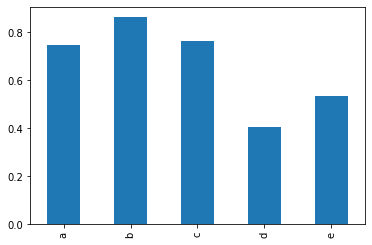

In [39]:
series.plot.bar()

<AxesSubplot:>

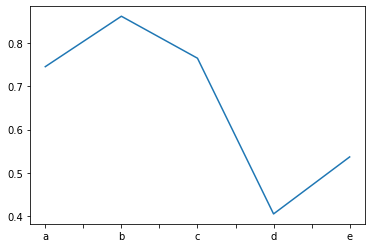

In [40]:
series.plot.line()

In [41]:
import matplotlib.pyplot as plt

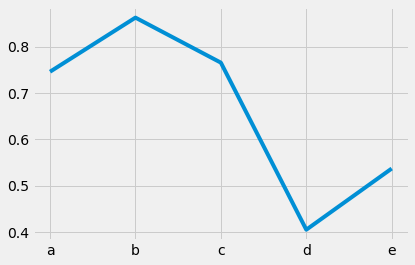

In [42]:
with plt.style.context('fivethirtyeight'):
    series.plot.line()

## Time Series

<AxesSubplot:>

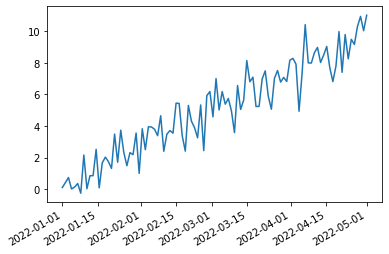

In [45]:
ts = pd.Series(10*np.linspace(0, 1, 100) + np.random.normal(0, 1, size=100),
              index=pd.date_range('2022-01-01', '2022-05-01', 100))
ts.plot.line()

<AxesSubplot:>

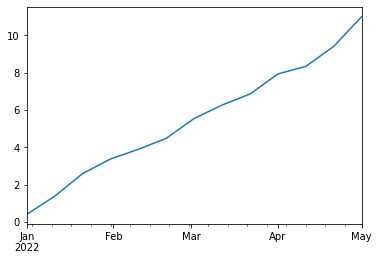

In [47]:
ts.resample('10D').mean().plot.line()

<AxesSubplot:>

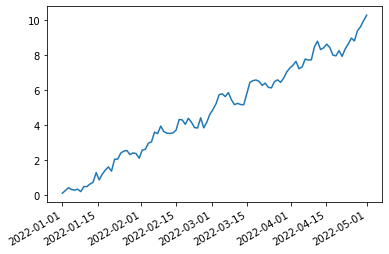

In [48]:
ts.rolling('5D').mean().plot.line()

<AxesSubplot:>

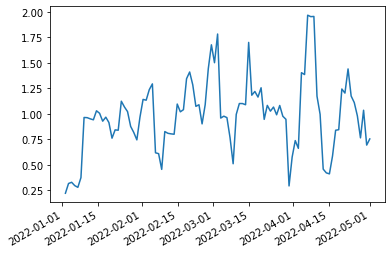

In [49]:
ts.rolling('5D').std().plot.line()

<AxesSubplot:>

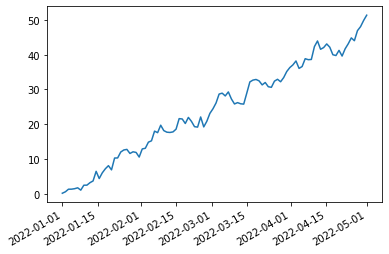

In [50]:
ts.rolling('5D').sum().plot.line()

In [53]:
?ts.rolling

Signature:
ts.rolling(
    window: 'int | timedelta | BaseOffset | BaseIndexer',
    min_periods: 'int | None' = None,
    center: 'bool_t' = False,
    win_type: 'str | None' = None,
    on: 'str | None' = None,
    axis: 'Axis' = 0,
    closed: 'str | None' = None,
    method: 'str' = 'single',
)
Docstring:
Provide rolling window calculations.

Parameters
----------
window : int, offset, or BaseIndexer subclass
    Size of the moving window.

    If an integer, the fixed number of observations used for
    each window.

    If an offset, the time period of each window. Each
    window will be a variable sized based on the observations included in
    the time-period. This is only valid for datetimelike indexes.
    To learn more about the offsets & frequency strings, please see `this link
    <https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases>`__.

    If a BaseIndexer subclass, the window boundaries
    based on the defined ``get_window_bounds`` 

<AxesSubplot:>

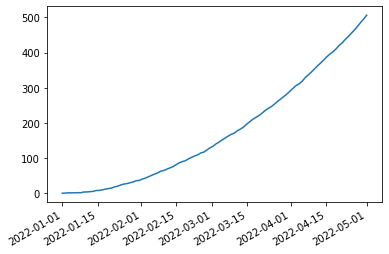

In [55]:
ts.cumsum().plot.line()

In [56]:
noble_gases = pd.DataFrame(
    {'Atomic Number': [2, 10, 18, 32],
     'Atomic Radius': [31, 38, 71, 88]},
    index=['He', 'Ne', 'Ar', 'Kr']
)

In [57]:
noble_gases

,Atomic Number,Atomic Radius
He,2,31
Ne,10,38
Ar,18,71
Kr,32,88


In [58]:
noble_gases['Atomic Number']

He     2
Ne    10
Ar    18
Kr    32
Name: Atomic Number, dtype: int64

In [59]:
noble_gases['Atomic Number']['He']

2

In [60]:
# filter
noble_gases[noble_gases['Atomic Number'] > 10]

,Atomic Number,Atomic Radius
Ar,18,71
Kr,32,88


In [61]:
noble_gases['Atomic Number'] > 10

He    False
Ne    False
Ar     True
Kr     True
Name: Atomic Number, dtype: bool

In [62]:
noble_gases.max()

Atomic Number    32
Atomic Radius    88
dtype: int64

In [63]:
noble_gases.mean()

Atomic Number    15.5
Atomic Radius    57.0
dtype: float64

<AxesSubplot:>

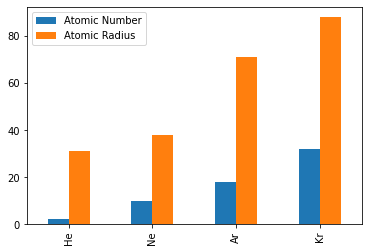

In [64]:
noble_gases.plot.bar()

<AxesSubplot:>

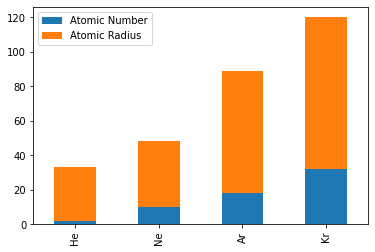

In [65]:
noble_gases.plot.bar(stacked=True)

In [66]:
noble_gases.T

,He,Ne,Ar,Kr
Atomic Number,2,10,18,32
Atomic Radius,31,38,71,88


<AxesSubplot:>

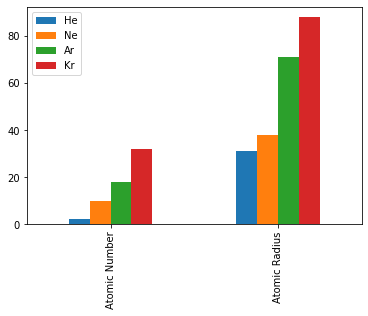

In [67]:
noble_gases.T.plot.bar()

In [68]:
?pd.read_csv

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    sep=<no_default>,
    delimiter=None,
    header='infer',
    names=<no_default>,
    index_col=None,
    usecols=None,
    squeeze=None,
    prefix=<no_default>,
    mangle_dupe_cols=True,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace=False,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    na_values=None,
    keep_default_na=True,
    na_filter=True,
    verbose=False,
    skip_blank_lines=True,
    parse_dates=None,
    infer_datetime_format=False,
    keep_date_col=False,
    date_parser=None,
    dayfirst=False,
    cache_dates=True,
    iterator=False,
    chunksize=None,
    compression: 'CompressionOptions' = 'infer',
    thousands=None,
    decimal: 'str' = '.',
    lineterminator=None,
    quotechar='"',
    quoting=0,
    doublequote=True,
    esc

# Reshaping

In [69]:
noble_gases

,Atomic Number,Atomic Radius
He,2,31
Ne,10,38
Ar,18,71
Kr,32,88


In [70]:
noble_gases.stack()

He  Atomic Number     2
    Atomic Radius    31
Ne  Atomic Number    10
    Atomic Radius    38
Ar  Atomic Number    18
    Atomic Radius    71
Kr  Atomic Number    32
    Atomic Radius    88
dtype: int64

In [71]:
noble_gases.stack().unstack()

,Atomic Number,Atomic Radius
He,2,31
Ne,10,38
Ar,18,71
Kr,32,88
